In [6]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import tensorflow as tf

In [7]:
# load data
work_dir = 'working_cats/images/'

x_train = np.load(work_dir+'x_train.npy')
print('loaded x_train.npy')
x_test = np.load(work_dir+'x_test.npy')
print('loaded x_test.npy')
x_val = np.load(work_dir+'x_test.npy')
print('loaded x_val.npy')

y_train = np.load(work_dir+'y_train.npy')
print('loaded y_train.npy')
y_test = np.load(work_dir+'y_test.npy')
print('loaded y_test.npy')
y_val = np.load(work_dir+'y_test.npy')
print('loaded y_val.npy')

loaded x_train.npy
loaded x_test.npy
loaded x_val.npy
loaded y_train.npy
loaded y_test.npy
loaded y_val.npy


In [8]:
# read in df
fn = 'working_cats/data/breeds_data_final.pkl'
breeds = pd.read_pickle(fn)
br = pd.unique(breeds['breed'])
num_breeds = len(br)

In [14]:
v = 4
plt.imshow(x_train[v])
print(y_train[v])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(32, 32, 3)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 

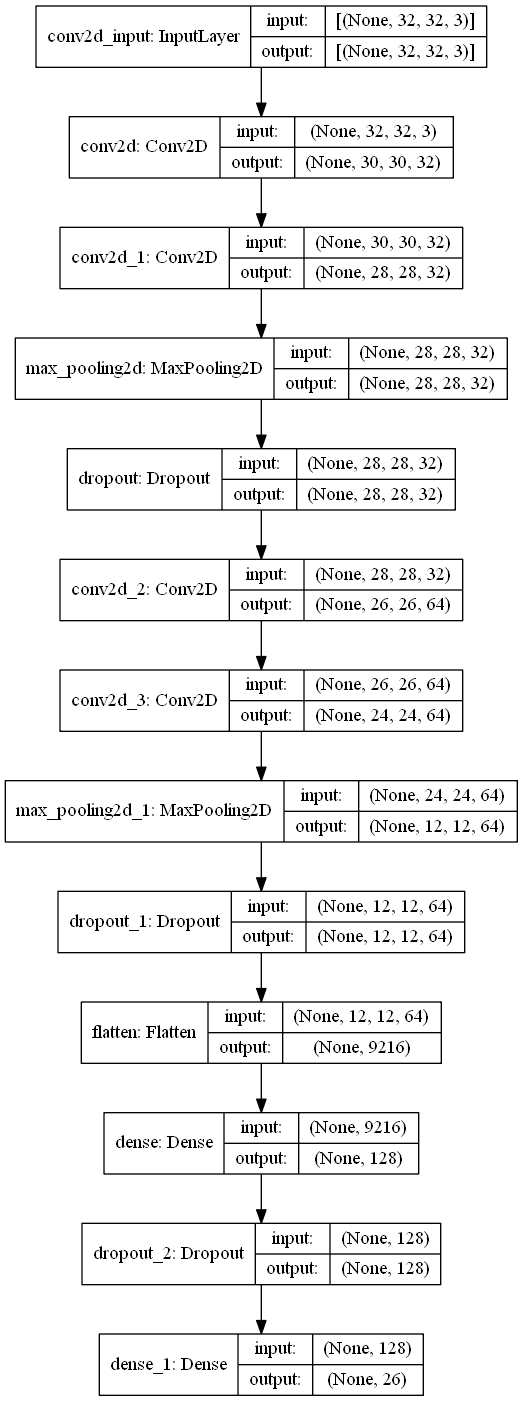

In [4]:
#build model

print(x_train.shape[1:])
ar_size = 32

model = Sequential([
    Conv2D(ar_size, 3, padding='valid', input_shape=x_train.shape[1:], activation='relu'),
    Conv2D(ar_size, 3, activation='relu'),
    MaxPooling2D(1,1),
    Dropout(0.25),

    Conv2D(ar_size * 2, 3, padding='valid', activation='relu'),
    Conv2D(ar_size * 2, 3, activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_breeds, activation='softmax'),
])

model.summary()

model_path = 'basic_CNN_model/model.png'
if not os.path.exists(model_path.rsplit('/',1)[0]):
    os.makedirs(model_path.rsplit('/',1)[0])
        
plot_model(model,to_file=model_path,show_shapes=True)

In [5]:
# train
batch_size = 128
epochs = 15
opt = RMSprop(momentum=0.9)

model.compile(optimizer='adam',
            loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, batch_size=batch_size,
                    validation_data=(x_val,y_val),
                    epochs=epochs)

Epoch 1/15
178/178 [==============================] - 22s 76ms/step - loss: 4467609.7026 - acc: 0.0453 - val_loss: 116284184.0000 - val_acc: 0.0636
Epoch 2/15
144/178 [=======================>......] - ETA: 1s - loss: 1734244545.7778 - acc: 0.0463

KeyboardInterrupt: 

In [ ]:
with open('basic_CNN_model/trainHistoryDict', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [ ]:
# Predict the values from the validation dataset
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

In [ ]:
plt.plot(history.history['acc'], label='training data')
plt.plot(history.history['val_acc'], label='validation data')
t = 'Accuracy with '+str(epochs)+' Epochs'
plt.title(t)
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
name = 'basic_CNN_model/model_Accuracy_'+str(epochs)+'Epochs.png'
plt.savefig(name)
plt.show()

In [ ]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=br, yticklabels=br)
plt.savefig('basic_CNN_model/Basic_CNN_heatmap.png')